<a href="https://colab.research.google.com/github/PrateekKumar135/SOFTWARE_RELIABILITY_PREDICTION_ML/blob/main/SOFTWARE_FAULT_PREDICTION(CM1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install dataprep

In [ ]:
# from dataprep.eda import create_report
# import pandas as pd
# data = pd.read_csv('/content/cm1.csv')
# create_report(data)

In [ ]:
# !pip install autoviz

In [ ]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV= AutoViz_Class()
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# dft = AV.AutoViz('/content/cm1.csv',verbose=2,chart_format='png')
# dft


In [ ]:
# Loading some example data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
pc1_data = pd.read_csv('/content/cm1.csv')
# Handle missing values

X = pc1_data.drop("defects", axis=1)
y = pc1_data.defects

In [ ]:
len(X.columns)

21

In [ ]:
pc1_data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [ ]:
pc1_data.shape

(498, 22)

In [ ]:
y.value_counts()

False    449
True      49
Name: defects, dtype: int64

**oversampling of 'y' column**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority',random_state=0)
X_res,y_res= ros.fit_resample(X,y)
y_res.value_counts()


False    449
True     449
Name: defects, dtype: int64

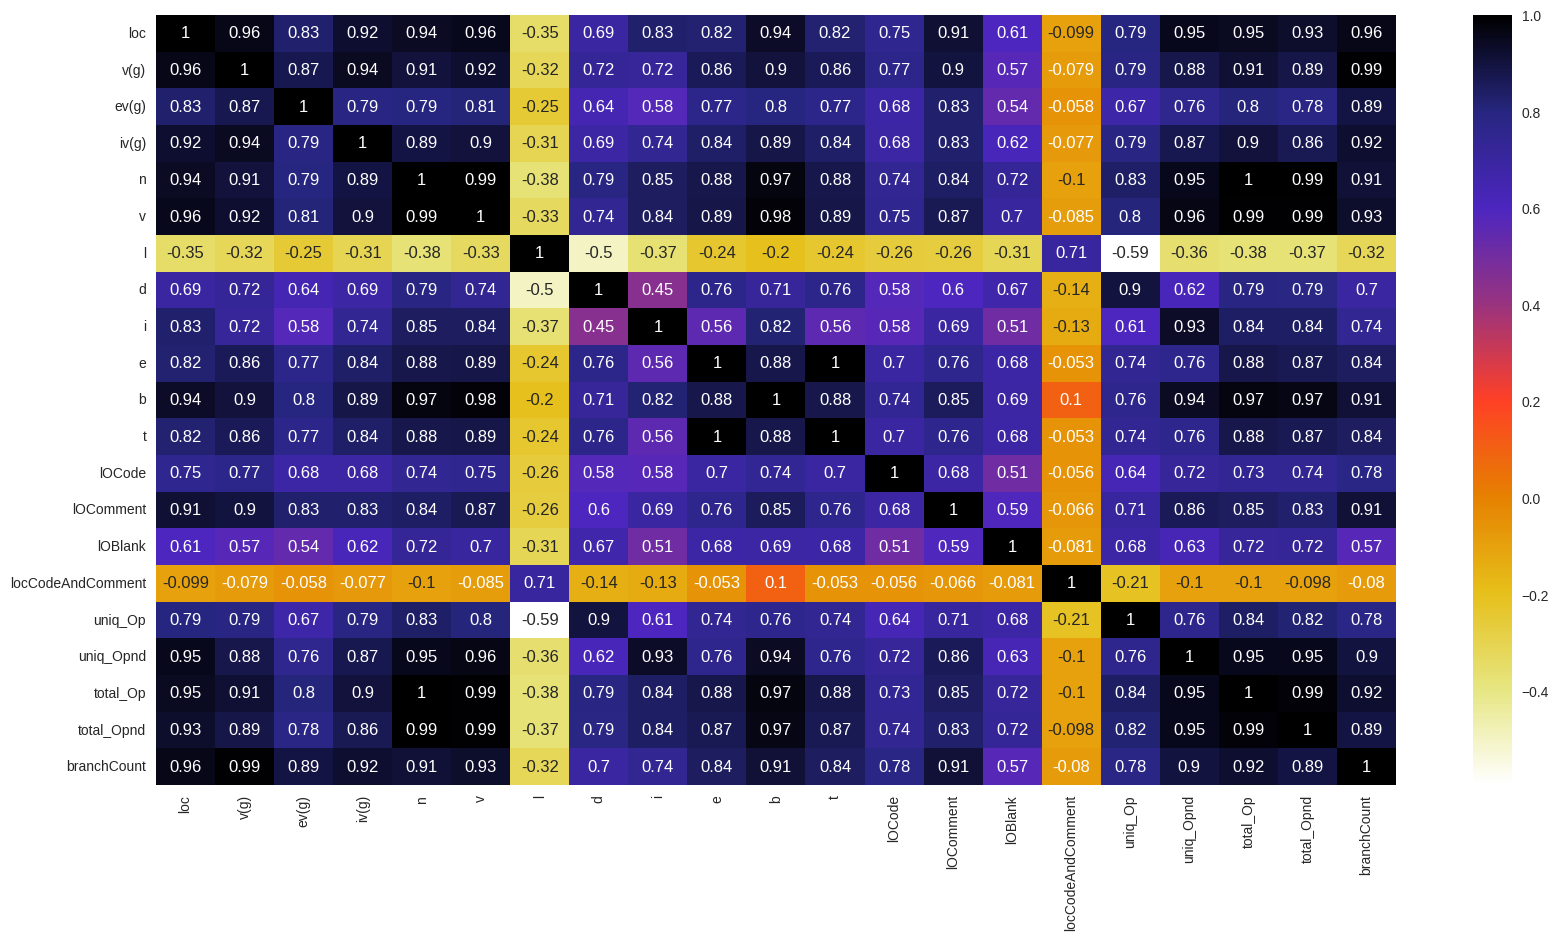

In [ ]:
# Split test and train data
X_res_train,X_res_test,y_res_train,y_res_test= train_test_split(X_res,y_res,test_size=0.2,random_state=0)

# Split test and train data
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
plt.figure(figsize=(20,10))
cor = X_res_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

def correlation(dataset,threshold):
  col_corr =set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>=threshold):
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_res_train,0.8)
print(corr_features)
print(len(corr_features))

{'iv(g)', 'i', 'uniq_Opnd', 'n', 'v', 'b', 'branchCount', 'total_Opnd', 'ev(g)', 'lOComment', 'e', 't', 'total_Op', 'v(g)', 'uniq_Op'}
15


In [ ]:
X_res_train=X_res_train.drop(corr_features,axis=1)
X_res_test=X_res_test.drop(corr_features,axis=1)

**RIDGE CLASSIFIER CV**

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
clf = RidgeClassifierCV(cv =cv_ori).fit(X_res_train,y_res_train)

y_pred = clf.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6666666666666666
Mean Accuracy: 0.7084
Mean Precision: 0.7126
Mean Recall: 0.7080


In [ ]:
y_scores = clf.decision_function(X_res_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_res_test, y_scores)

In [ ]:
thresholds

array([ 2.76441843e+00,  1.76441843e+00,  1.50492051e+00,  9.92381768e-01,
        8.70147506e-01,  8.50945529e-01,  7.08883104e-01,  5.59258500e-01,
        5.31800471e-01,  5.07733162e-01,  4.56855907e-01,  4.23909940e-01,
        4.03723349e-01,  3.26120960e-01,  3.10949510e-01,  3.01131430e-01,
        2.97641949e-01,  2.71295426e-01,  1.81882974e-01,  1.80502002e-01,
        1.78047731e-01,  1.59371245e-01,  1.55226343e-01,  1.44531356e-01,
        1.39126051e-01,  1.34557883e-01,  1.23368133e-01,  1.18755454e-01,
        1.14820711e-01,  1.08652239e-01,  1.07663619e-01,  1.00745744e-01,
        8.32933974e-02,  7.78303975e-02,  7.29559515e-02,  7.09506444e-02,
        5.57020737e-02,  3.15565404e-02,  3.06419195e-02,  1.38947155e-02,
        9.79547715e-03,  3.21658391e-03, -1.28805275e-03, -2.12359818e-03,
       -3.46761106e-03, -1.71997334e-02, -3.10391952e-02, -3.50137969e-02,
       -9.52306870e-02, -9.81068134e-02, -9.95501746e-02, -1.07574019e-01,
       -1.09557297e-01, -

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score
# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_res_test, y_scores)
# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve(Area = {roc_auc: .2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


Optimal threshold is: -0.03501379689612014


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_log = LogisticRegressionCV(n_jobs=-1,cv =cv_ori).fit(X_res_train,y_res_train)
y_pred = clf_log.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_log, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.7333333333333333
Mean Accuracy: 0.7553
Mean Precision: 0.7584
Mean Recall: 0.7552


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_dt.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_dt, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.9222222222222223
Mean Accuracy: 0.9503
Mean Precision: 0.9552
Mean Recall: 0.9507


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors=4,n_jobs=-1).fit(X_res_train,y_res_train)
y_pred = clf_knn.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_knn, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.8722222222222222
Mean Accuracy: 0.8914
Mean Precision: 0.9056
Mean Recall: 0.8923


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.01,random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_ada.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_ada, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.6944444444444444
Mean Accuracy: 0.7251
Mean Precision: 0.7265
Mean Recall: 0.7249


**GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)
clf_gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,random_state=0).fit(X_res_train,y_res_train)
y_pred = clf_gb.predict(X_res_test)
accuracy = accuracy_score(y_res_test,y_pred)
print(accuracy)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(clf_gb, X_res_train, y_res_train, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

0.8722222222222222
Mean Accuracy: 0.9206
Mean Precision: 0.9263
Mean Recall: 0.9211


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score


gb_scores = clf_gb.predict_proba(X_res_test)[:,1]
ada_scores = clf_ada.predict_proba(X_res_test)[:,1]
knn_scores = clf_knn.predict_proba(X_res_test)[:,1]
dt_scores = clf_dt.predict_proba(X_res_test)[:,1]
log_scores = clf_log.predict_proba(X_res_test)[:,1]


# Generate ROC curve data for gradient boost,ada boost,knn,decision tree,logistic classification
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_res_test, gb_scores)
gb_auc = roc_auc_score(y_res_test, gb_scores)
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_res_test, ada_scores)
ada_auc = roc_auc_score(y_res_test, ada_scores)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_res_test, knn_scores)
knn_auc = roc_auc_score(y_res_test, knn_scores)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_res_test, dt_scores)
dt_auc = roc_auc_score(y_res_test, dt_scores)
log_fpr, log_tpr, log_thresholds = roc_curve(y_res_test, log_scores)
log_auc = roc_auc_score(y_res_test, log_scores)


# Define a list of colors for your models
# color?s = ['blue', 'orange', 'green', 'purple', 'red']
trace0 = go.Scatter(
    x=gb_fpr,
    y=gb_tpr,
    mode='lines',
    name=f'Gradient boost (Area = {gb_auc:.2f})',fill='none'
)


trace1 = go.Scatter(
    x=ada_fpr,
    y=ada_tpr,
    mode='lines',
    name=f'Ada boost (Area = {ada_auc:.2f})',fill='none'
)
trace2 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'KNN (Area = {knn_auc:.2f})',line=dict(color='orange')

)
trace3 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'Decision Tree (Area = {dt_auc:.2f})',line=dict(color='black')

)
trace4 = go.Scatter(
    x=log_fpr,
    y=log_tpr,
    mode='lines',
    name=f'Logistic regression (Area = {log_auc:.2f})'
)


# Diagonal line
trace5 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2,trace3, trace4, trace5]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegressionCV was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



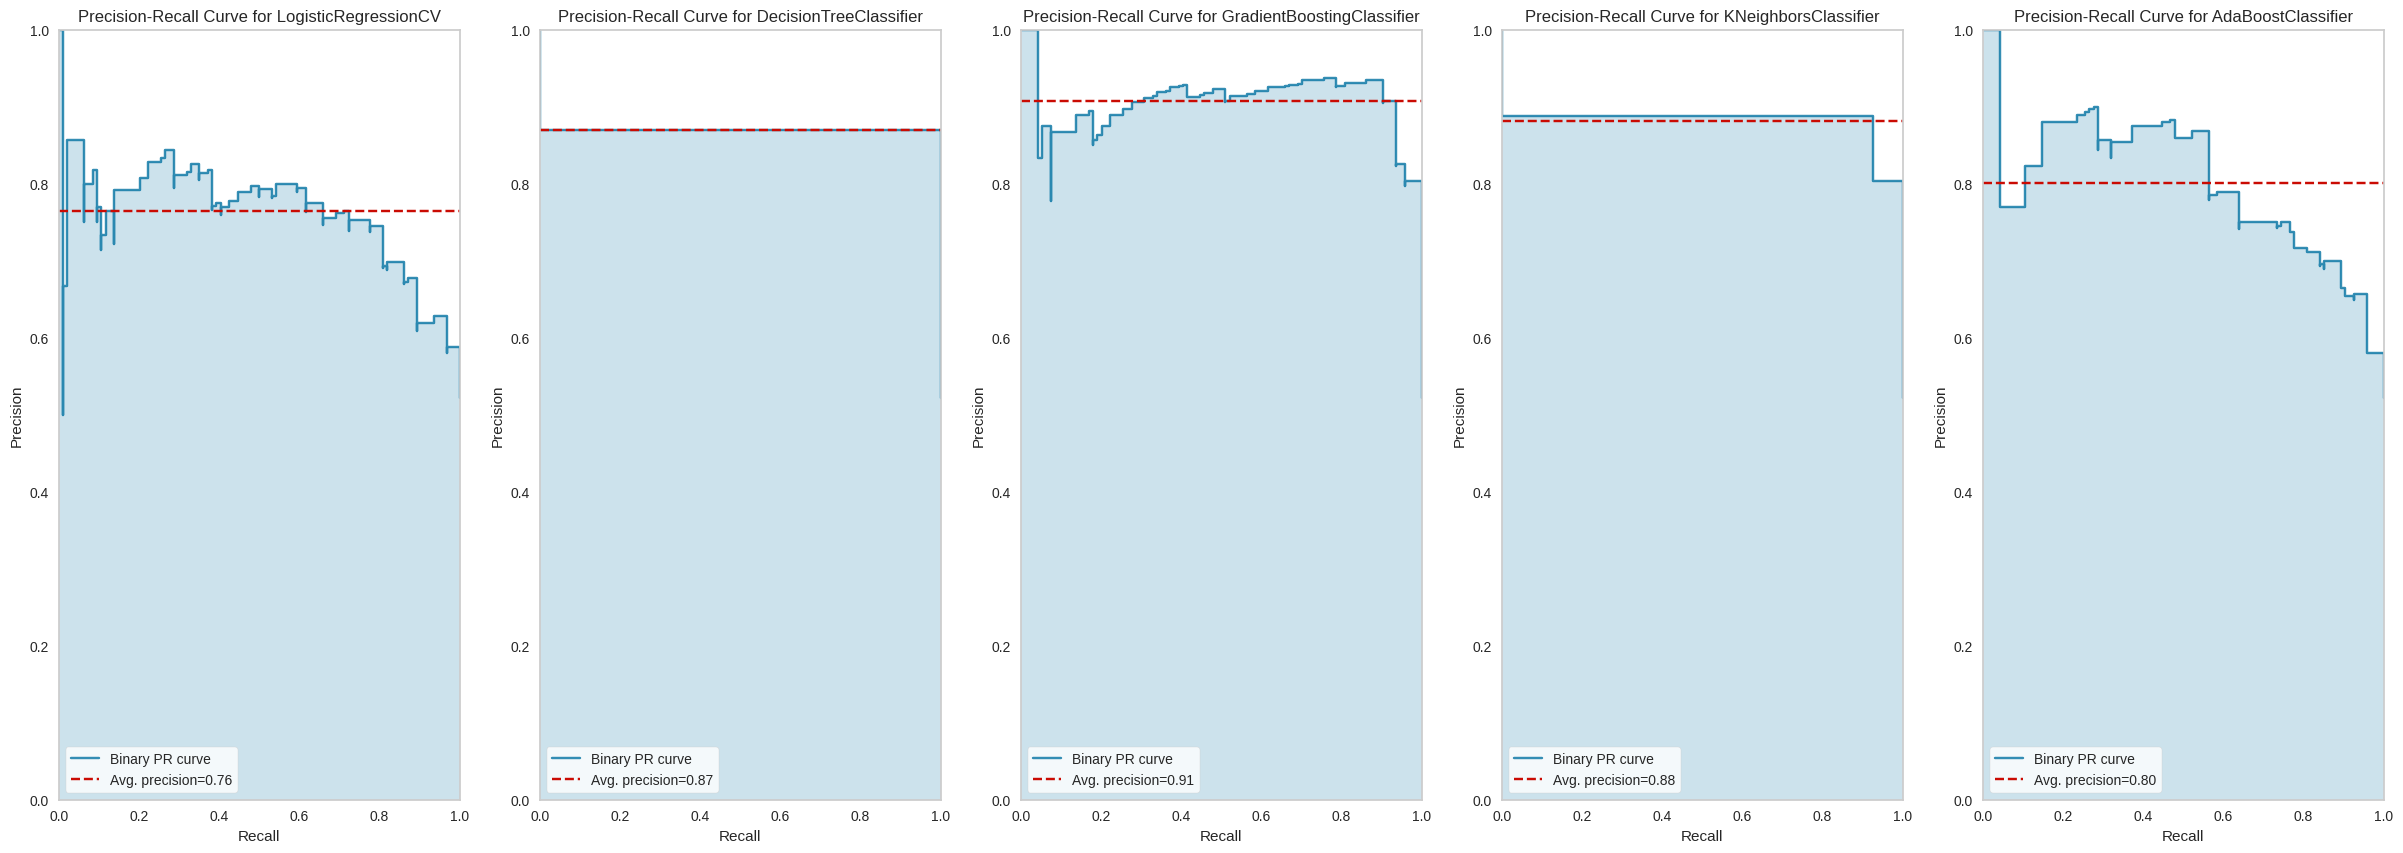

In [ ]:
# Create the visualizers, fit, score, and show them
from yellowbrick.classifier import PrecisionRecallCurve
models = [clf_log,clf_dt,clf_gb,clf_knn,clf_ada]
_, axes = plt.subplots(ncols=5, figsize=(30,10))

for idx, ax in enumerate(axes.flatten()):
    viz = PrecisionRecallCurve(models[idx], ax=ax, show=False)
    viz.fit(X_res_train, y_res_train)
    viz.score(X_res_test, y_res_test)
    viz.finalize()

plt.show()